In [1]:
import numpy as np
import ConfigParser
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, './lib/')
from help_functions import *

In [2]:
config = ConfigParser.RawConfigParser()
config.read('configuration.txt')
#patch to the datasets
path_data = config.get('data paths', 'path_local')

In [3]:
train_gt = load_hdf5(path_data + config.get('data paths', 'train_groundTruth'))
train_masks = load_hdf5(path_data + config.get('data paths', 'train_border_masks'))

In [4]:
for i in range(train_gt.shape[0]):
    mask = train_masks[i]
    mask_index = (mask == 0)[0]
    train_gt[i, :, mask_index] = 0

In [5]:
artery = train_gt[0, 0].flatten()
background = train_gt[0, 1].flatten()
vein = train_gt[0, 2].flatten()

In [6]:
count_artery = np.unique(artery, return_counts=True)[1][1]
count_background = np.unique(background, return_counts=True)[1][1]
count_vein = np.unique(vein, return_counts=True)[1][1]

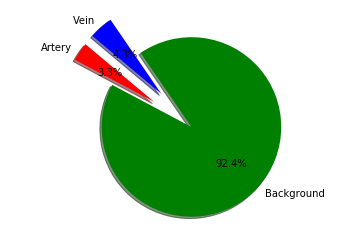

In [7]:
labels = ['Artery', 'Background', 'Vein']
sizes = [count_artery, count_background, count_vein]
colors = ['red', 'green', 'blue']
explode = (0.5, 0, 0.5)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.savefig('pie_chart.png', bbox_inches='tight')
plt.show()